<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m04/c1/sprint/SaludFeto_Analisis_descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/notebook_banner.png" width="1024" style="float:center">
<div style="margin-top:10px; display:flex; align-items:center;">
    <div style="float:left; margin-right:10px;vertical-align:middle">
        <a href="https://www.linkedin.com/in/bruno-angles/" targer="_blank">
            <img src="https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/lkin-logo.png"/>
        </a>
    </div>
    <div> 
        Bruno Anglés (11/01/2022)
    </div>
 </div>

 # Análisis descriptivo dataset salud feto

In [31]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

# ESTILO DE LOS GRÁFICOS
plt.style.use('ggplot')

params = {'axes.titlesize':'10'}
plt.rcParams.update(params)

plt_colors = list(sns.color_palette().as_hex())

def plt_color(i):
    return plt_colors[i % len(plt_colors)]


## Carga del fichero de datos

In [32]:
! [ -f ASI_casoPractico.csv ] || wget https://raw.githubusercontent.com/tuxsy/iebs-master-data-science/main/m04/c1/sprint/ASI_casoPractico.csv

data = pd.read_csv("ASI_casoPractico.csv", sep=";")

data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


## Análisis exploratorio

In [33]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [34]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(["nunique"]).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [35]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [36]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [37]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


## Respuesta preguntas sprint 1

### P1: Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúa

In [56]:
# Tipos de variables contenidos en el dataset
list(data.dtypes.unique())

[dtype('int64'), dtype('float64')]

Todas las varaibles del daset son numéricas y cuantitativas, se clasificarán del siguiente modo atendiendo a los valores que toman dichas variables:


*   contínuas
*   discretas



In [62]:
# Variables cuantitativas
DISCRETE_VARS = [
  "DS", # {0, 1}
  "DP", # {0, 1, 2, 3, 4}
  "Tendency" # {-1, 0, 1}
]


CONTINUOUS_VARS = [col for col in data.columns if col not in DISCRETE_VARS and col != "Target"]
print("Variables contínuas:", CONTINUOUS_VARS)
print("Variables discretas:", DISCRETE_VARS)

# Nos aseguramos que todas las variables del Data Frame están clasificadas
assert len([col for col in data.columns if col not in CONTINUOUS_VARS + DISCRETE_VARS]) == 1 # La variable objetivo no está clasificada

Variables contínuas: ['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']
Variables discretas: ['DS', 'DP', 'Tendency']


In [58]:
# Valores que toman las variables discretas
data[DISCRETE_VARS].agg(["nunique",set]).T

,nunique,set
DS,2,"{0, 1}"
DP,5,"{0, 1, 2, 3, 4}"
Tendency,3,"{0, 1, -1}"


Consideramos tres variables como discretas atendiendo al conjunto limitado de valores que puede tomar. El resto de variables se consideran contínuas.

In [63]:
# Comprobación del rango de las variables contínuas
data[CONTINUOUS_VARS].agg(["min", "max"]).T

,min,max
LBE,106.0,160.0
AC,0.0,26.0
FM,0.0,564.0
UC,0.0,23.0
ASTV,12.0,87.0
MSTV,0.2,7.0
ALTV,0.0,91.0
MLTV,0.0,50.7
DL,0.0,16.0
Width,3.0,180.0


### P2: ¿Cuál es la proporción de estados fetales normales? ¿y anormales?

0    1655
1     471
Name: Target, dtype: int64


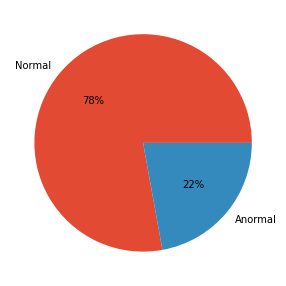

In [40]:
# Gráfico de tarta sobre la variable objetivo

a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())


El dataset contiene un `78%` de casos etiquetados como *normales* y un `22%` *anormales*.

El dataset está *desbalanceado* y debemos tenerlo en cuenta a la hora de entrenar nuestro modelo

### P:3 Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.

In [41]:
# P3: 
data[["FM", "ALTV", "Median"]].describe().T

,count,mean,std,min,25%,50%,75%,max
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
Median,2126.0,138.090310,14.466589,77.0,129.0,139.0,148.0,186.0




*   Las variables **FM** y **ALTV** parece que siguen una distribución sesgada hacia la derecha (right skewed), ya que la media es superior a la mediana. Esto significa que puede tomar unos pocos valores anormalmente altos.
*   La variable **Median** parece seguir una distribución simétrica, ya que la media y la mediana son muy parecidas. Esto indica que esta variable toma aproximadamente la mitad de sus valores por debajo de la media y la otra mitad por encima.


Vamos a comprobarlo visualmente a través de sus histogramas.

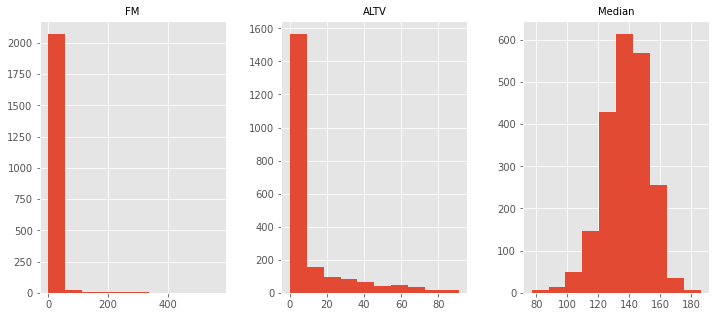

In [64]:
data.hist(column=["FM", "ALTV", "Median"], layout=(1,3), figsize=(12,5))
plt.show()

A la hora de entrenar nuestro modelo, puede ser conveniente experimentar con una transformación logarítimica de las variables sesgadas a la derecha (FM y ALTV).

### P4: Obtenga el histograma para las variables: LBE, DS y Min

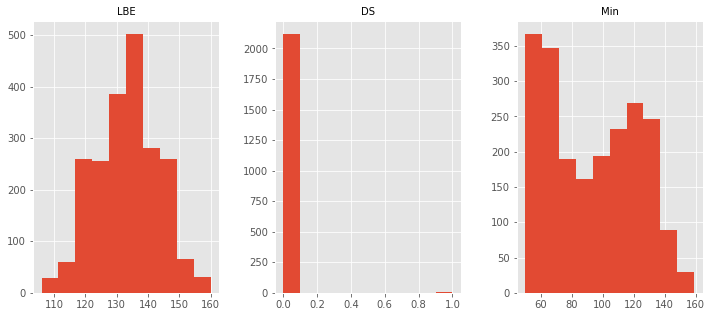

In [46]:
# Obtención de los histogramas
data.hist(column=["LBE", "DS", "Min"], layout=(1,3), figsize=(12,5))
plt.show()



- La variable **LBE** tiene una distribución simétrica (media y mediana son parecidas)
- La variable **DS** toma sólo dos valores: `{0,1}`
- La variable **Min** sigue una distribución *bimodal*, es decir tiene dos picos. ¿Se corresponden estos picos con el estado *Normal/Anormal* del feto?. De ser así podríamos tener esto en cuenta a la hora de entrenar nuestro modelo. Vamos a comprobarlo.



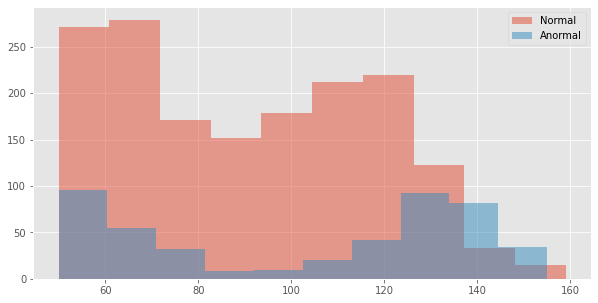

In [99]:
# Comprobamos si los picos tienen que ver con el estado del feto

fig = plt.figure(figsize=(10,5))

plt.hist(data.loc[data.Target == 0,"Min"], alpha=0.5, label="Normal")
plt.hist(data.loc[data.Target == 1,"Min"], alpha=0.5, label="Anormal")

plt.legend()
plt.show()

No parece que haya relación entre los picos y el estado del feto.

### P5: Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean. 

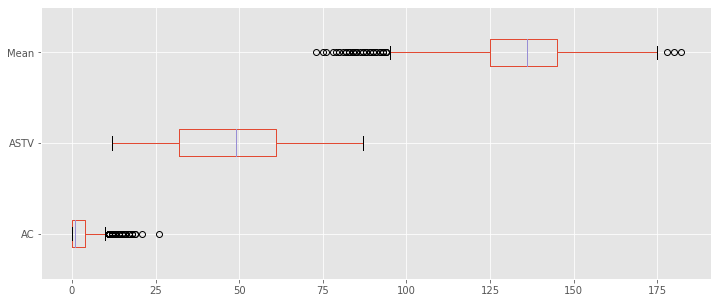

In [104]:
# Gráfico boxplot
data.boxplot(column=["AC", "ASTV", "Mean"], vert=False, figsize=(12,5))
plt.show()

- **Mean** tiene valores anómalos tanto en la parte superior como inferior del rango (muchos más en la inferior
- **ASTV** no parece tener valores anómalos.
- **AC** tiene valores anómalos en la parte superior de su rango.

Según este análisis, es recomendable un tratamiento de valores anómalos.